<a href="https://colab.research.google.com/github/shofiaayuu/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : SHOFIATUL AYU ANIKANINGRUM

KELAS : TI - 3F

ABSEN : 29

PERTEMUAN 7


## MODUL 7 - Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:
   
   a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan
      Salinan pada akun github seperti pada modul sebelumnya.

   b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

  c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

  a. Sharpen

  b. Emboss

  c. Left Sobel Edge Detection

  d. Canny Edge Detection

  e. Prewitt Edge Detection

  f. 5x5 Gaussian Blur

  g. 21x21 Gaussian Blur

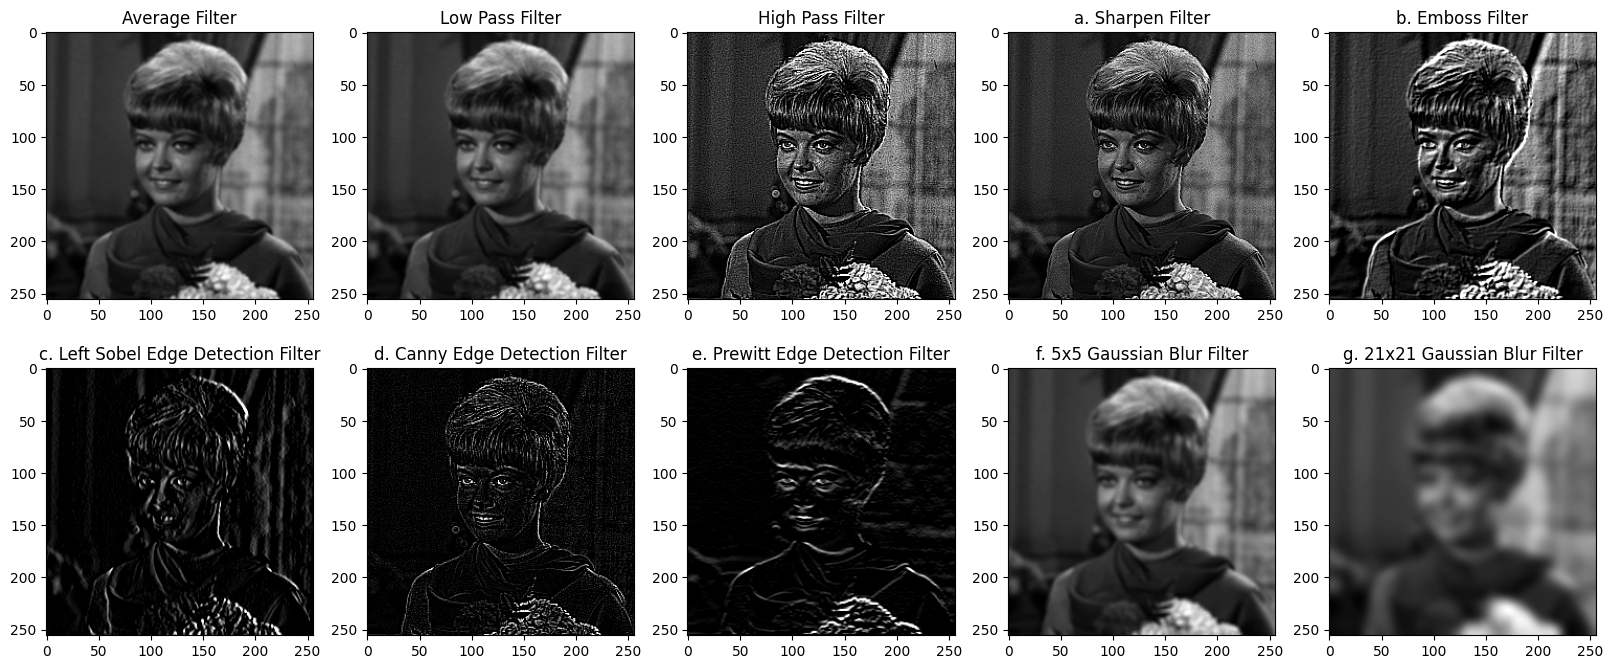

In [4]:
# Memuat citra
image = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Mendefinisikan ukuran kernel dan sigma untuk Gaussian blur
kernel_size_3x3 = 3
kernel_size_5x5 = 5
kernel_size_21x21 = 21
sigma_3x3 = math.sqrt(kernel_size_3x3)
sigma_5x5 = math.sqrt(kernel_size_5x5)
sigma_21x21 = math.sqrt(kernel_size_21x21)

# Membuat kernel Gaussian
gaussian_kernel_3x3 = cv.getGaussianKernel(kernel_size_3x3, sigma_3x3)
gaussian_kernel_5x5 = cv.getGaussianKernel(kernel_size_5x5, sigma_5x5)
gaussian_kernel_21x21 = cv.getGaussianKernel(kernel_size_21x21, sigma_21x21)
gauss_kernel_3x3 = gaussian_kernel_3x3 @ gaussian_kernel_3x3.transpose()
gauss_kernel_5x5 = gaussian_kernel_5x5 @ gaussian_kernel_5x5.transpose()
gauss_kernel_21x21 = gaussian_kernel_21x21 @ gaussian_kernel_21x21.transpose()

# Mengaplikasikan filter ke citra dan menyimpan hasilnya dalam daftar
filtered_images = [
    cv.filter2D(image, -1, np.ones((3, 3), np.float32) / 9.0),  # Filter Rata-rata
    cv.filter2D(image, -1, gauss_kernel_3x3),  # Filter Low Pass
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [-1,  9, -1],
                                    [-1, -1, -1]], dtype=np.float32)),  # Filter High Pass
    cv.filter2D(image, -1, np.array([[0, -1, 0],
                                    [-1,  5, -1],
                                    [0, -1, 0]], dtype=np.float32)),  # Filter Sharpen
    cv.filter2D(image, -1, np.array([[-2, -1,  0],
                                    [-1,  1,  1],
                                    [ 0,  1,  2]], dtype=np.float32)),  # Filter Emboss
    cv.filter2D(image, -1, np.array([[1, 0, -1],
                                    [2, 0, -2],
                                    [1, 0, -1]], dtype=np.float32)),  # Filter Deteksi Tepi Kiri Sobel
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]], dtype=np.float32)),  # Filter Deteksi Tepi Canny
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [0, 0, 0],
                                    [1, 1, 1]], dtype=np.float32)),  # Filter Deteksi Tepi Prewitt
    cv.filter2D(image, -1, gauss_kernel_5x5),  # Filter Gaussian 5x5
    cv.filter2D(image, -1, gauss_kernel_21x21)  # Filter Gaussian 21x21
]

# Membuat subplot untuk setiap citra hasil filter
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Menentukan nama filter untuk label
filter_names = [
    'Average Filter',
    'Low Pass Filter',
    'High Pass Filter',
    'a. Sharpen Filter',
    'b. Emboss Filter',
    'c. Left Sobel Edge Detection Filter',
    'd. Canny Edge Detection Filter',
    'e. Prewitt Edge Detection Filter',
    'f. 5x5 Gaussian Blur Filter',
    'g. 21x21 Gaussian Blur Filter'
]

# Menampilkan dan memberi label pada setiap citra hasil filter
for i, ax in enumerate(axs.flat):
    ax.imshow(filtered_images[i], cmap='gray')
    ax.set_title(filter_names[i])
    ax.axis('on')

# Menampilkan plot
plt.show()